Dataset: https://www.kaggle.com/free4ever1/instagram-fake-spammer-genuine-accounts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((576, 12), (120, 12))

In [4]:
train.head(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
5,1,0.00,4,0.0,0,81,1,0,344,669987,150,0
6,1,0.00,2,0.0,0,50,0,0,16,122,177,0
7,1,0.00,2,0.0,0,0,0,0,33,1078,76,0
8,1,0.00,0,0.0,0,71,0,0,72,1824,2713,0
9,1,0.00,2,0.0,0,40,1,0,213,12945,813,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [6]:
train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [7]:
train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

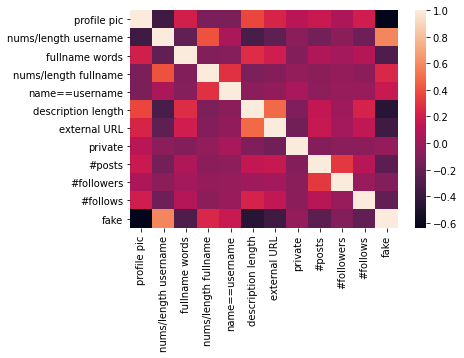

In [8]:
corr=train.corr()
sns.heatmap(corr)

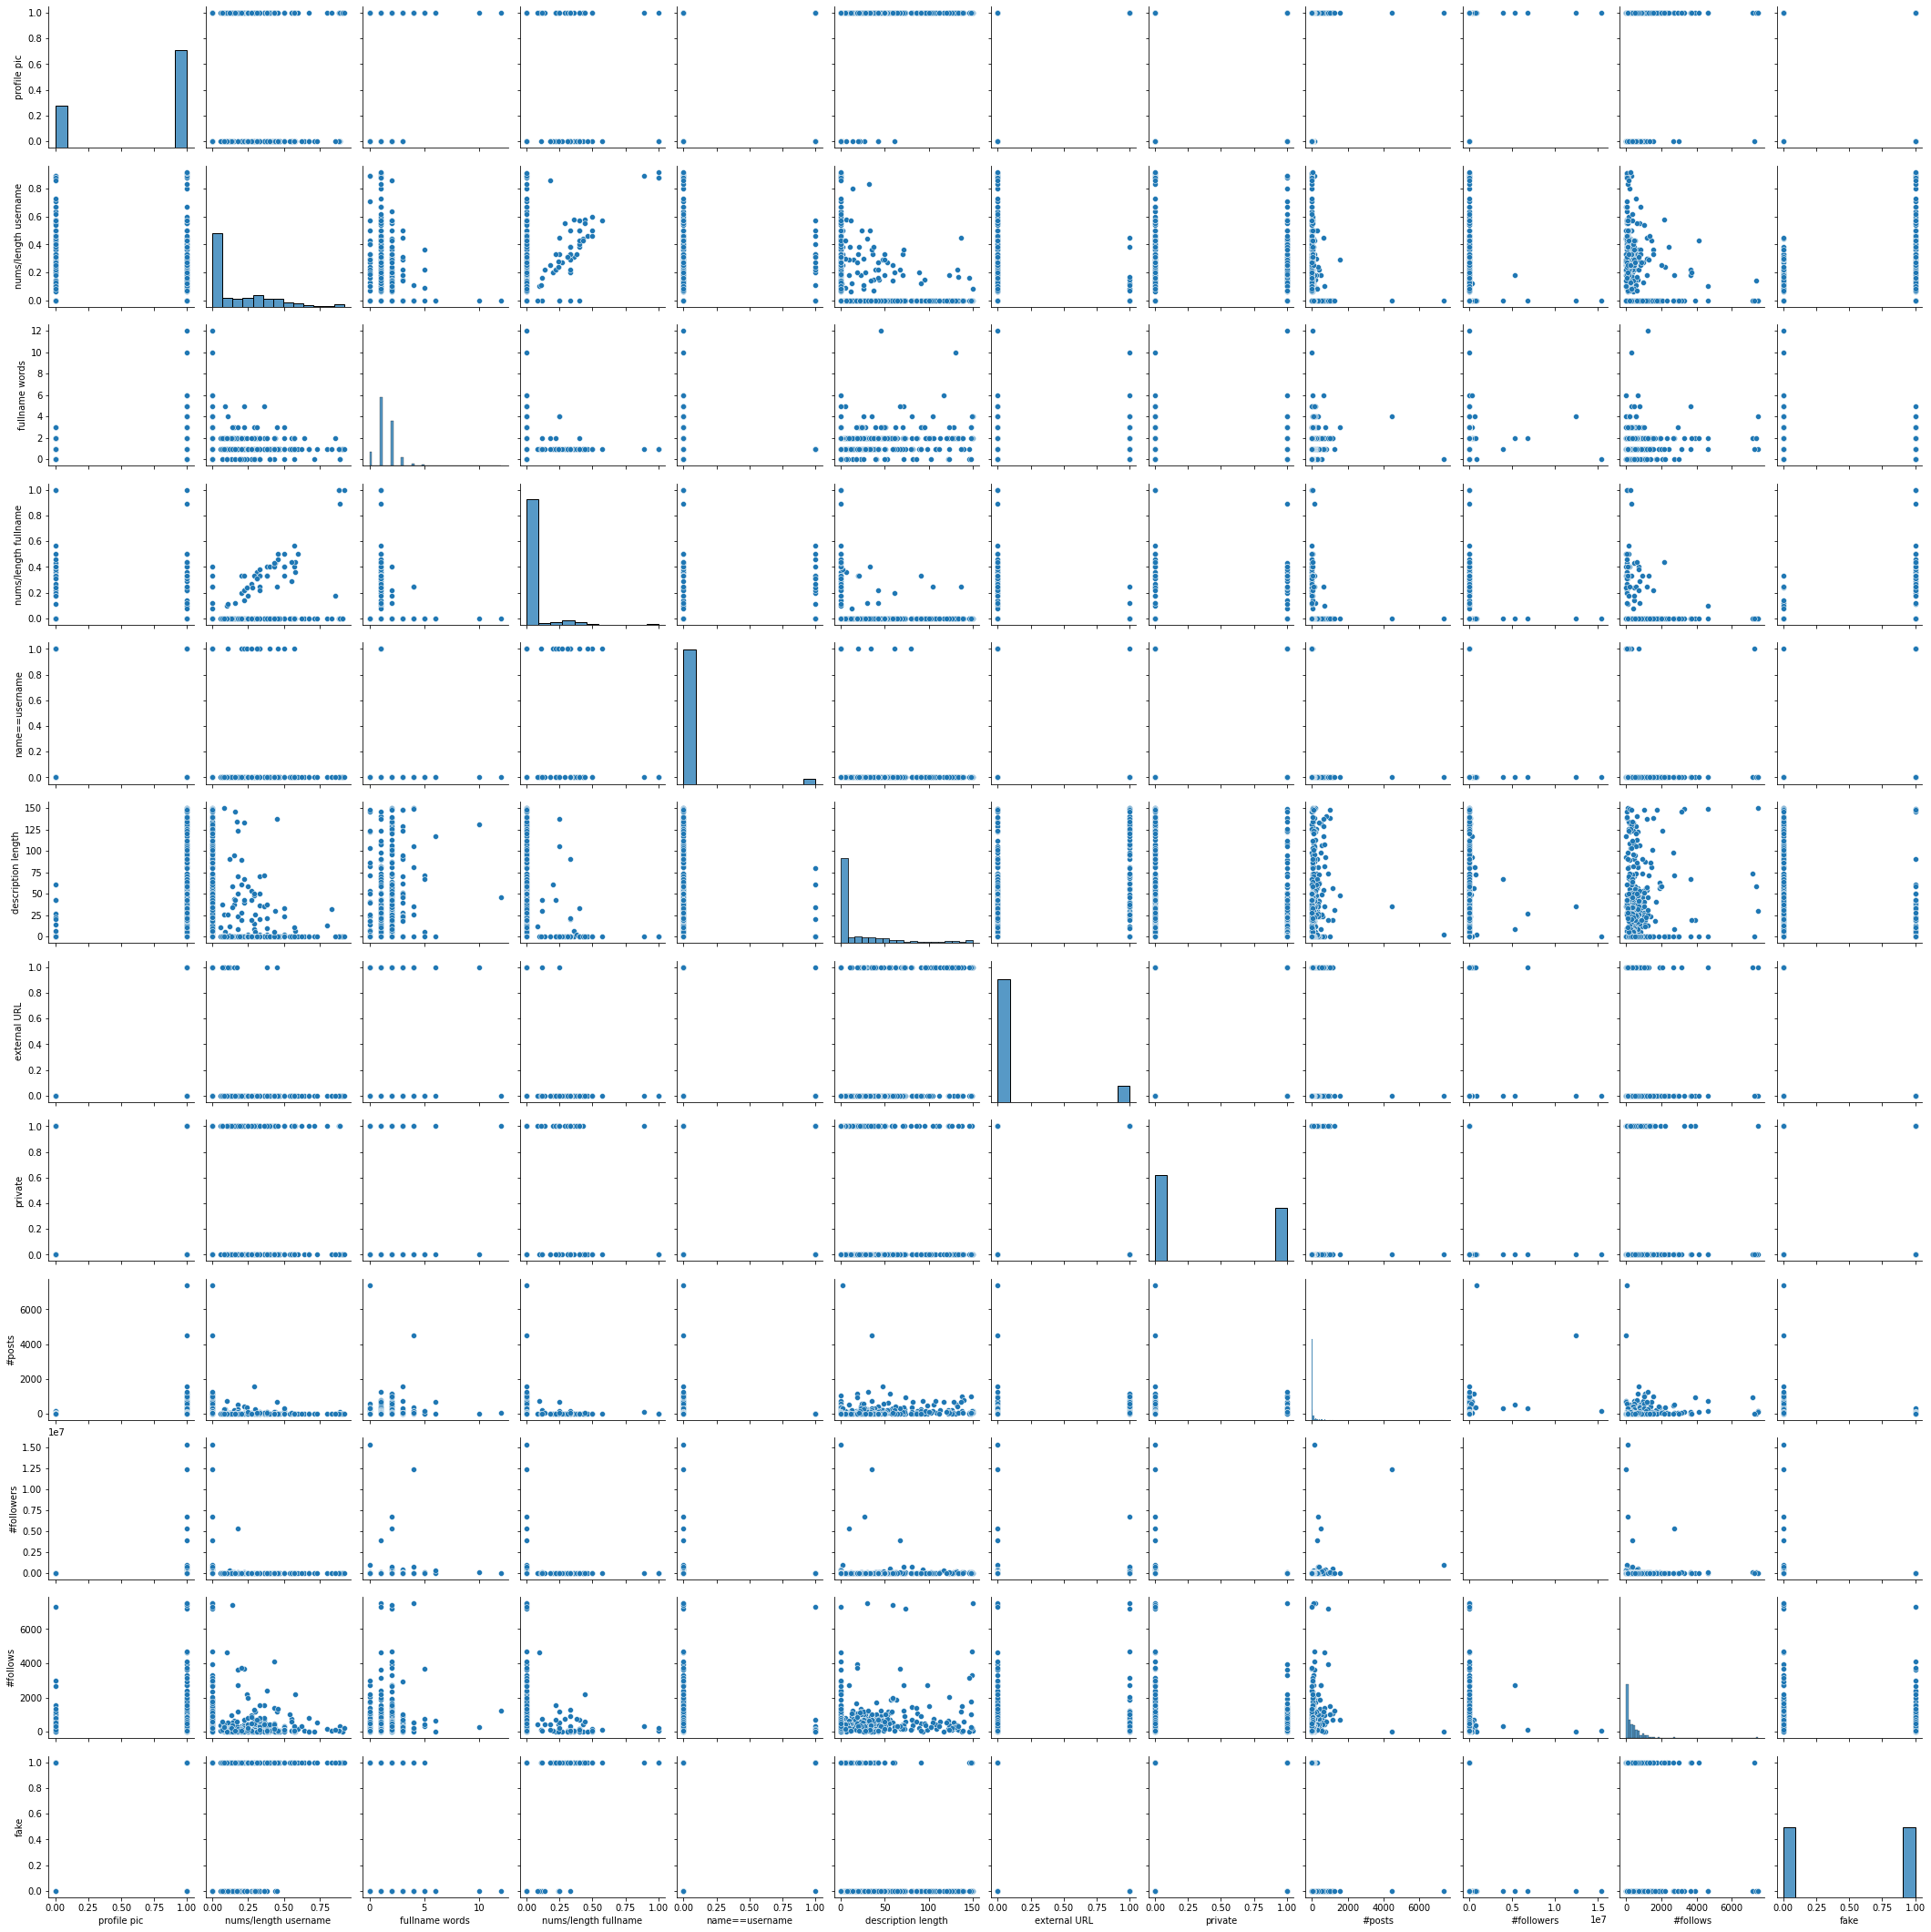

In [9]:
sns.pairplot(train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


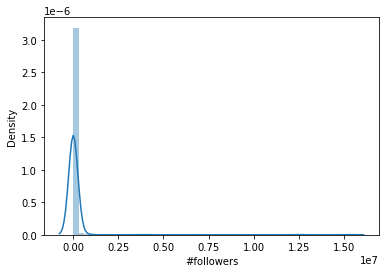

In [16]:
sns.distplot( train['#followers'] )

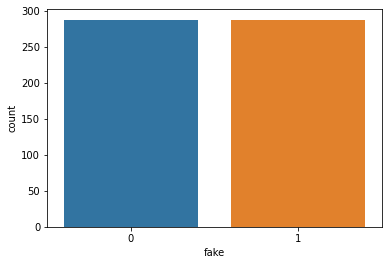

In [10]:
sns.countplot(x="fake", data=train)

In [18]:
train['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

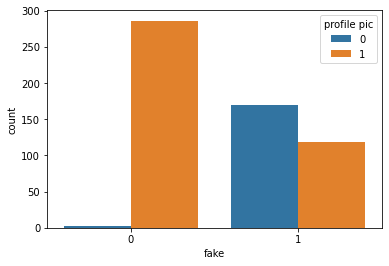

In [11]:
sns.countplot(x="fake", data=train, hue="profile pic")

From this countplot, we can observe that most of the fake accounts have no profile pic and almost all genuine user accounts have a profile pic on their instagram account. 

This observation can provide great help in identifying the fake accounts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa053c15150>,
      dtype=object)

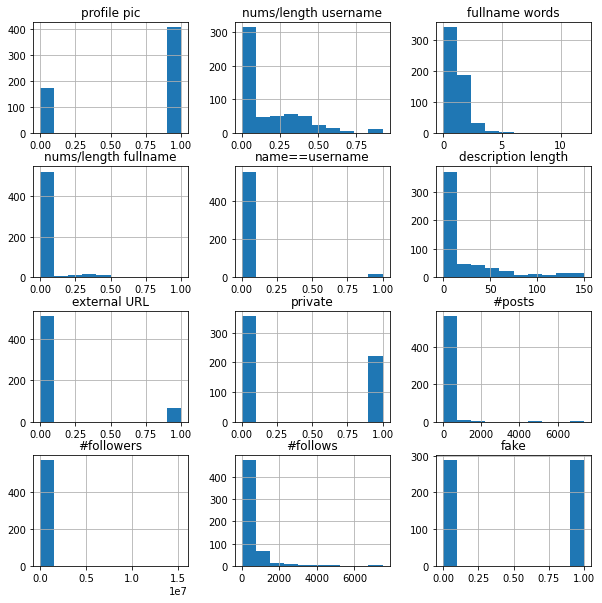

In [26]:
train.hist(figsize=(10,10))

Some key observations:
- There are more users having a profile pic than users not having a profile pic.
- The username of users contains mostly the alphabets and very less numeric values
- The length of bio of most of the users is not more than 50 words.
- There are more public accounts than private accounts on instagram.

In [ ]:
# Since nums/length username is not having a huge impact on deciding if an account is fake or not, we can remove this column
train.drop(columns=['nums/length username'], inplace=True)

In [57]:
train.head()

,profile pic,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0,0.0,0,53,0,0,32,1000,955,0
1,1,2,0.0,0,44,0,0,286,2740,533,0
2,1,2,0.0,0,0,0,1,13,159,98,0
3,1,1,0.0,0,82,0,0,679,414,651,0
4,1,2,0.0,0,0,0,1,6,151,126,0


In [70]:
# maximum no. of followers possessed by a user belonging to the group of users with no profile picture
train[train['profile pic']==0]['#followers'].max()

3033

In [71]:
# Dead accounts are characterized by a lack of substantial activity on the platform, primarily concerning the accounts with no profile picture, empty bio and 0 posts. 
# Determine the number of dead accounts, if they exist.

print(train[(train['profile pic']==0) & (train['description length']==0) & (train['#posts']==0)].shape[0])

123


#### Find out how expressive a person is on Instagram based on the length of their bio. 
(Hint: An expressive person can be defined as the user whose description_length exceeds the average.)

In [72]:
print("Average description length: ",train['description length'].mean())

exp = train[train['description length']>train['description length'].mean()]
print("Number of expressive people: ",exp.shape[0])

df=pd.DataFrame(data=None)
df['expressive']=(exp['description length']/exp['description length'].max())*100

df['expressive'] = [round(x) for x in df['expressive']]
df.head()

Average description length:  22.62326388888889
Number of expressive people:  182


,expressive
0,35
1,29
3,55
5,54
6,33


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa04550fe90>]],
      dtype=object)

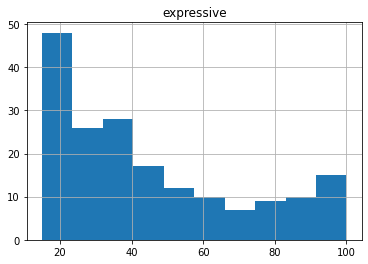

In [74]:
#Visualization of how expressive a person is 
df.hist()

#### Determine the maximum no. of followers possessed by a user among those who have 0 posts on their respective accounts

In [75]:
train[train['#posts']==0]['#followers'].max()

3033

#### Fake accounts have been witnessed to heavily skew the follower and following numbers. What is the ratio of number of followers (#followers) to number of following (#follows) for the user with the maximum number of following?


In [93]:
train[train['#follows']==train['#follows'].max()]

,profile pic,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
130,1,4,0.0,0,150,1,0,161,1383,7500,0
276,1,1,0.0,0,30,0,1,103,1775,7500,0


We can see that there are two users who have maximum number of following

In [100]:
ind = train[train['#follows']==train['#follows'].max()].index.to_list()
ind

[130, 276]

In [111]:
for i in ind:
  print("Ratio for user index",i,"th: ",train['#followers'][i]/train['#follows'][i])

Ratio for user index 130 th:  0.1844
Ratio for user index 276 th:  0.23666666666666666
